In [7]:
import geopandas
import numpy as np
import pandas as pd
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, Legend, Span, Tabs, Text, Title
from bokeh.plotting import figure, output_notebook, show
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import rasterio

In [8]:
geopandas.__version__

'0.13.2'

In [3]:
path='/Users/anandafigueiredo/GitHub/heatwaves/'
geo_phil=geopandas.read_file(path+'phl_adminboundaries_candidate_adm3')

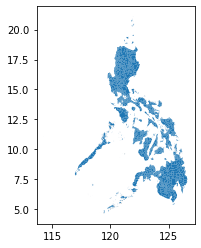

In [4]:
geo_phil.plot()
# plt.ylim(7.0,7.5)
# plt.xlim(123,126)
plt.show()

In [9]:
worldpop=rasterio.open(path+'phl_ppp_2020.tif')

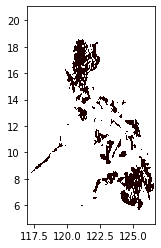

In [13]:
from rasterio.plot import show

fig, ax = plt.subplots()

extent = [worldpop.bounds[0], worldpop.bounds[2], worldpop.bounds[1], worldpop.bounds[3]]
ax = rasterio.plot.show(worldpop, extent=extent, ax=ax, cmap="pink")


In [14]:
worldpop.crs

CRS.from_epsg(4326)

In [19]:
rds = rioxarray.open_rasterio(path+'phl_ppp_2020.tif')
rds.name = "data"
df = rds.squeeze().to_dataframe().reset_index()
geometry = gpd.points_from_xy(df.x, df.y)
gdf = gpd.GeoDataFrame(df, crs=rds.rio.crs, geometry=geometry)

NameError: name 'rioxarray' is not defined

In [15]:
pop_by_town=worldpop.sjoin(geo_phil,how="inner")

AttributeError: 'DatasetReader' object has no attribute 'sjoin'

In [18]:
treecover=rasterio.open(path+'Hansen_GFC-2022-v1.10_treecover2000_20N_120E.tif')
treecover.crs

CRS.from_epsg(4326)

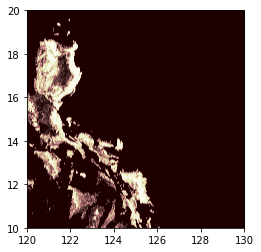

In [17]:
from rasterio.plot import show

fig, ax = plt.subplots()

extent = [treecover.bounds[0], treecover.bounds[2], treecover.bounds[1], treecover.bounds[3]]
ax = rasterio.plot.show(treecover, extent=extent, ax=ax, cmap="pink")



In [ ]:
pop = geopandas.read_file(path+'phl_general_2020.csv')
pop.head

In [ ]:
print(type(pop.longitude[2]))

In [ ]:
pop.plot()
x=pop.latitude
y=pop.longitude
print(x,y)
plt.scatter(x, y)
plt.show()

In [ ]:
pop.crs="EPSG:3121"

In [ ]:
pop.head

In [ ]:
geo_phil=geo_phil.to_crs(pop.crs)

In [ ]:
geo_phil.crs

In [ ]:
pop_by_town=pop.sjoin(geo_phil,how="inner")
pop_by_town.head